In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_validate
#from sklearn.model_selection import cross_val_predict

%matplotlib inline

#sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [2]:
df = pd.read_csv('final_df.csv')

In [3]:
df

,Unnamed: 0,id,Title,Domestic_Gross,Foreign_Gross,domestic_opening_gross,rating,foreign_market_count,distributor,director,...,Is_Adaptation,Is_Sequel,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,Action,Adventure,Comedy
0,269,803096,Warcraft,"$47,365,290","$391,683,624","$24,166,110",PG-13,66,Universal Pictures,Duncan Jones,...,0,0,0,0,1,0,0,1,0,0
1,762,1473832,Bridget Jones's Baby,"$24,252,420","$187,700,000","$8,571,785",R,61,Universal Pictures,Sharon Maguire,...,0,0,0,0,1,0,0,0,0,1
2,403,1293847,xXx: Return of Xander Cage,"$44,898,413","$301,219,864","$20,130,142",PG-13,55,Paramount Pictures,D.J. Caruso,...,0,1,0,0,0,0,0,1,0,0
3,420,2034800,The Great Wall,"$45,540,830","$289,393,001","$18,469,620",PG-13,64,Universal Pictures,Yimou Zhang,...,0,0,0,0,1,0,0,1,0,0
4,674,453451,Mr. Bean's Holiday,"$33,302,167","$198,923,741","$9,889,780",G,68,Universal Pictures,Steve Bendelack,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,469,878804,The Blind Side,"$255,959,475","$53,248,834","$34,119,372",PG-13,33,Warner Bros.,John Lee Hancock,...,0,0,0,0,0,0,1,0,0,0
844,1092,1408253,Ride Along,"$134,938,200","$19,530,702","$41,516,170",PG-13,19,Universal Pictures,Tim Story,...,0,0,0,0,1,0,0,1,0,0
845,822,1649419,The Impossible,"$19,019,882","$179,067,330","$143,818",PG-13,47,Lionsgate,J.A. Bayona,...,0,0,0,0,0,0,0,0,0,0
846,1021,415306,Talladega Nights: The Ballad of Ricky Bobby,"$148,213,377","$15,148,718","$47,042,215",PG-13,39,Sony Pictures Entertainment (SPE),Adam McKay,...,0,1,1,0,0,0,0,0,0,1


In [4]:
#delete old index
del df['Unnamed: 0']

In [5]:
df

,id,Title,Domestic_Gross,Foreign_Gross,domestic_opening_gross,rating,foreign_market_count,distributor,director,actor_1,...,Is_Adaptation,Is_Sequel,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,Action,Adventure,Comedy
0,803096,Warcraft,"$47,365,290","$391,683,624","$24,166,110",PG-13,66,Universal Pictures,Duncan Jones,Travis Fimmel,...,0,0,0,0,1,0,0,1,0,0
1,1473832,Bridget Jones's Baby,"$24,252,420","$187,700,000","$8,571,785",R,61,Universal Pictures,Sharon Maguire,Renée Zellweger,...,0,0,0,0,1,0,0,0,0,1
2,1293847,xXx: Return of Xander Cage,"$44,898,413","$301,219,864","$20,130,142",PG-13,55,Paramount Pictures,D.J. Caruso,Vin Diesel,...,0,1,0,0,0,0,0,1,0,0
3,2034800,The Great Wall,"$45,540,830","$289,393,001","$18,469,620",PG-13,64,Universal Pictures,Yimou Zhang,Matt Damon,...,0,0,0,0,1,0,0,1,0,0
4,453451,Mr. Bean's Holiday,"$33,302,167","$198,923,741","$9,889,780",G,68,Universal Pictures,Steve Bendelack,Rowan Atkinson,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,878804,The Blind Side,"$255,959,475","$53,248,834","$34,119,372",PG-13,33,Warner Bros.,John Lee Hancock,Quinton Aaron,...,0,0,0,0,0,0,1,0,0,0
844,1408253,Ride Along,"$134,938,200","$19,530,702","$41,516,170",PG-13,19,Universal Pictures,Tim Story,Ice Cube,...,0,0,0,0,1,0,0,1,0,0
845,1649419,The Impossible,"$19,019,882","$179,067,330","$143,818",PG-13,47,Lionsgate,J.A. Bayona,Naomi Watts,...,0,0,0,0,0,0,0,0,0,0
846,415306,Talladega Nights: The Ballad of Ricky Bobby,"$148,213,377","$15,148,718","$47,042,215",PG-13,39,Sony Pictures Entertainment (SPE),Adam McKay,Will Ferrell,...,0,1,1,0,0,0,0,0,0,1


In [6]:
df['Domestic_Gross'] = df['Domestic_Gross'].apply(lambda x: x.strip('$').replace(',', "")).astype(int)



In [7]:
df['Foreign_Gross'] = df['Foreign_Gross'].apply(lambda x: x.strip('$').replace(',', "")).astype(int)



In [8]:
df['domestic_opening_gross'] = df['domestic_opening_gross'].apply(lambda x: x.strip('$').replace(',', "")).astype(int)


In [9]:
df['rating'] = df['rating'].astype(str)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   id                                   848 non-null    int64 
 1   Title                                848 non-null    object
 2   Domestic_Gross                       848 non-null    int64 
 3   Foreign_Gross                        848 non-null    int64 
 4   domestic_opening_gross               848 non-null    int64 
 5   rating                               848 non-null    object
 6   foreign_market_count                 848 non-null    int64 
 7   distributor                          848 non-null    object
 8   director                             848 non-null    object
 9   actor_1                              848 non-null    object
 10  actor_2                              848 non-null    object
 11  Years_Since_Release                  848 non-

In [11]:
#adding in rating dummy variable
ratings_df = pd.get_dummies(df.rating) 

In [12]:
ratings_df

,G,PG,PG-13,R
0,0,0,1,0
1,0,0,0,1
2,0,0,1,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
843,0,0,1,0
844,0,0,1,0
845,0,0,1,0
846,0,0,1,0


In [13]:
#manually dropping last - R rating.
del ratings_df['R']

In [14]:
model_df = pd.concat([df, ratings_df], axis=1)

In [15]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   id                                   848 non-null    int64 
 1   Title                                848 non-null    object
 2   Domestic_Gross                       848 non-null    int64 
 3   Foreign_Gross                        848 non-null    int64 
 4   domestic_opening_gross               848 non-null    int64 
 5   rating                               848 non-null    object
 6   foreign_market_count                 848 non-null    int64 
 7   distributor                          848 non-null    object
 8   director                             848 non-null    object
 9   actor_1                              848 non-null    object
 10  actor_2                              848 non-null    object
 11  Years_Since_Release                  848 non-

In [16]:
model_df.describe()

,id,Domestic_Gross,Foreign_Gross,domestic_opening_gross,foreign_market_count,Years_Since_Release,Is_Adaptation,Is_Sequel,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,Action,Adventure,Comedy,G,PG,PG-13
count,8.480000e+02,8.480000e+02,8.480000e+02,8.480000e+02,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000
mean,1.687654e+06,1.480195e+08,2.338689e+08,4.315225e+07,54.173349,9.199292,0.265330,0.331368,0.121462,0.142689,0.142689,0.136792,0.172170,0.457547,0.185142,0.162736,0.017689,0.241745,0.508255
std,1.674985e+06,1.097454e+08,2.104699e+08,3.746207e+07,14.149877,5.309024,0.441769,0.470983,0.326856,0.349961,0.349961,0.343831,0.377751,0.498489,0.388642,0.369342,0.131895,0.428393,0.500227
min,1.206670e+05,1.805800e+04,1.514872e+07,7.456000e+03,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.149532e+05,7.993945e+07,1.006330e+08,2.177808e+07,49.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.221726e+06,1.162019e+08,1.622227e+08,3.302118e+07,56.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.129886e+06,1.772822e+08,2.889412e+08,5.303104e+07,64.000000,13.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.426210e+06,9.366622e+08,2.029931e+09,3.571150e+08,86.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
model_df.corr()

,id,Domestic_Gross,Foreign_Gross,domestic_opening_gross,foreign_market_count,Years_Since_Release,Is_Adaptation,Is_Sequel,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,Action,Adventure,Comedy,G,PG,PG-13
id,1.000000,0.031053,0.121485,0.059401,0.130565,-0.770827,-0.061037,0.102505,-0.021475,-0.026979,0.073692,0.040478,0.020593,-0.038107,0.044678,-0.073371,-0.038510,0.034923,-0.073827
Domestic_Gross,0.031053,1.000000,0.788206,0.879490,0.123147,-0.095121,0.030443,0.232717,-0.048051,-0.053125,-0.051395,0.289976,0.018684,0.140872,0.091143,-0.145895,0.021703,0.033724,0.122314
Foreign_Gross,0.121485,0.788206,1.000000,0.740727,0.200171,-0.225981,0.053086,0.302394,-0.044841,0.017291,-0.045595,0.240126,0.030867,0.186859,0.174747,-0.249069,0.014458,0.049606,0.129602
domestic_opening_gross,0.059401,0.879490,0.740727,1.000000,0.132709,-0.155187,0.001735,0.321390,-0.051179,-0.053471,-0.017010,0.271974,0.031550,0.238297,0.059132,-0.189026,0.010437,-0.034602,0.178479
foreign_market_count,0.130565,0.123147,0.200171,0.132709,1.000000,-0.308499,0.039851,0.082784,0.231571,0.166423,0.050074,-0.094668,-0.189584,0.109090,0.051265,-0.107741,-0.021256,0.074882,0.057594
Years_Since_Release,-0.770827,-0.095121,-0.225981,-0.155187,-0.308499,1.000000,0.017195,-0.101989,-0.007843,-0.007063,-0.029303,-0.058933,-0.041266,-0.101413,-0.052236,0.170696,0.033739,-0.031071,0.025831
Is_Adaptation,-0.061037,0.030443,0.053086,0.001735,0.039851,0.017195,1.000000,0.008184,-0.019043,0.037382,-0.069531,-0.021595,0.023077,0.005639,0.119261,-0.098521,-0.019856,0.097366,-0.001909
Is_Sequel,0.102505,0.232717,0.302394,0.321390,0.082784,-0.101989,0.008184,1.000000,-0.008673,0.056619,-0.007847,0.004092,-0.029064,0.233479,0.025640,-0.147475,0.019566,-0.011296,0.061039
Sony Pictures Entertainment (SPE),-0.021475,-0.048051,-0.044841,-0.051179,0.231571,-0.007843,-0.019043,-0.008673,1.000000,-0.151693,-0.151693,-0.148018,-0.169570,0.028062,-0.028529,0.012109,-0.049896,0.017709,0.055238
Twentieth Century Fox,-0.026979,-0.053125,0.017291,-0.053471,0.166423,-0.007063,0.037382,0.056619,-0.151693,1.000000,-0.166437,-0.162405,-0.186052,0.017845,0.109356,-0.051983,0.021989,0.100398,-0.010108


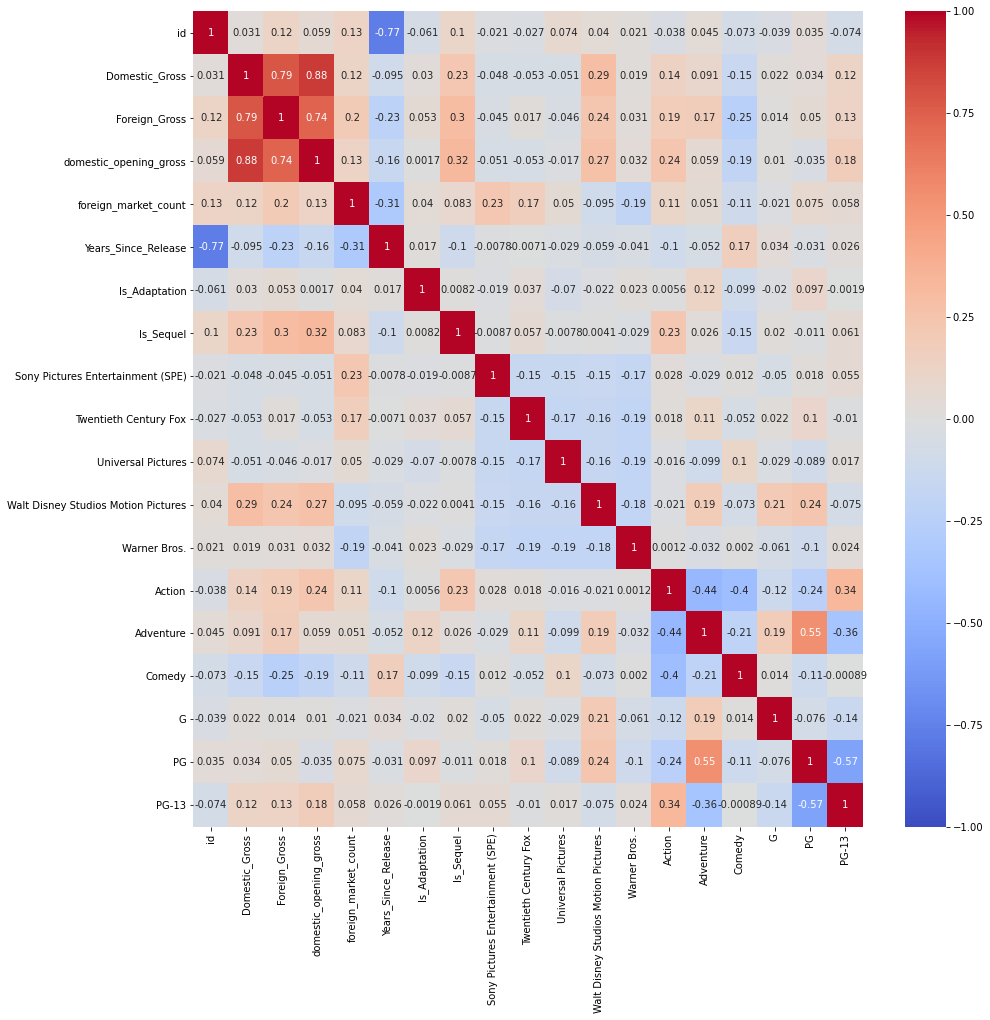

In [61]:
plt.figure(figsize=(15, 15))
sns.heatmap(model_df.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm');

### Looking at our data to note any outliers we want to clean before we begin modeling

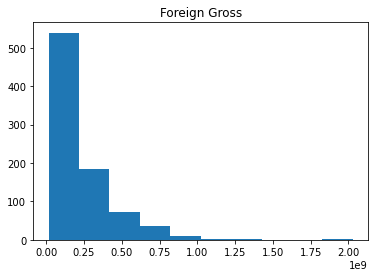

In [62]:
#target variable is not normally distributed

plt.hist(model_df['Foreign_Gross']); plt.title('Foreign Gross');

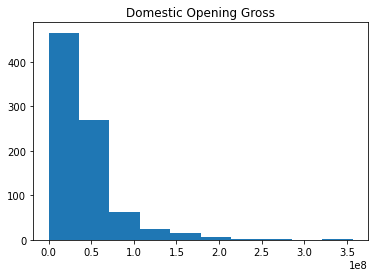

In [63]:
#our main feature is skewed--we may want to get rid of the outliers on the right
plt.hist(model_df['domestic_opening_gross']); plt.title('Domestic Opening Gross');

In [17]:
model_df.sort_values(by = ['domestic_opening_gross'])
#for now we will keep as is the low domestic grosses don't have any other indications of being an outlier.


,id,Title,Domestic_Gross,Foreign_Gross,domestic_opening_gross,rating,foreign_market_count,distributor,director,actor_1,...,Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,Action,Adventure,Comedy,G,PG,PG-13
847,2017561,Journey to the West,18058,205619125,7456,PG-13,7,Magnolia Pictures,Stephen Chow,Zhang Wen,...,0,0,0,0,1,0,0,0,0,1
717,1179904,Paranormal Activity,107918810,85436990,77873,R,49,Paramount Pictures,Oren Peli,Katie Featherston,...,0,0,0,0,0,0,0,0,0,0
838,1091191,Lone Survivor,125095601,29707311,90872,R,45,Universal Pictures,Peter Berg,Mark Wahlberg,...,0,1,0,0,1,0,0,0,0,0
25,1675434,The Intouchables,10198820,416389690,103507,R,49,The Weinstein Company,Olivier Nakache,François Cluzet,...,0,0,0,0,0,0,0,0,0,0
337,3741834,Lion,51738905,88574023,123360,PG-13,50,The Weinstein Company,Garth Davis,Dev Patel,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,369610,Jurassic World,652270625,1018130819,208806270,PG-13,66,Universal Pictures,Colin Trevorrow,Chris Pratt,...,0,1,0,0,1,0,0,0,0,1
549,2527336,Star Wars: Episode VIII - The Last Jedi,620181382,712358805,220009584,PG-13,52,Walt Disney Studios Motion Pictures,Rian Johnson,Daisy Ridley,...,0,0,1,0,1,0,0,0,0,1
526,2488496,Star Wars: Episode VII - The Force Awakens,936662225,1131561811,247966675,PG-13,62,Walt Disney Studios Motion Pictures,J.J. Abrams,Daisy Ridley,...,0,0,1,0,1,0,0,0,0,1
241,4154756,Avengers: Infinity War,678815482,1369544272,257698183,PG-13,54,Walt Disney Studios Motion Pictures,Anthony Russo,Robert Downey Jr.,...,0,0,1,0,1,0,0,0,0,1


In [18]:
#let's look at this very low domestic opening and high foreign gross row.
df[847:848]

,id,Title,Domestic_Gross,Foreign_Gross,domestic_opening_gross,rating,foreign_market_count,distributor,director,actor_1,...,Is_Adaptation,Is_Sequel,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,Action,Adventure,Comedy
847,2017561,Journey to the West,18058,205619125,7456,PG-13,7,Magnolia Pictures,Stephen Chow,Zhang Wen,...,0,0,0,0,0,0,0,1,0,0


In [19]:
#after a quick box office mojo search, I see it's actually an international film.
#this escaped my earlier data cleaning. We will remove this

model_df= model_df.drop(index=847)

In [20]:
model_df.sort_values(by = ['domestic_opening_gross'])

,id,Title,Domestic_Gross,Foreign_Gross,domestic_opening_gross,rating,foreign_market_count,distributor,director,actor_1,...,Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,Action,Adventure,Comedy,G,PG,PG-13
717,1179904,Paranormal Activity,107918810,85436990,77873,R,49,Paramount Pictures,Oren Peli,Katie Featherston,...,0,0,0,0,0,0,0,0,0,0
838,1091191,Lone Survivor,125095601,29707311,90872,R,45,Universal Pictures,Peter Berg,Mark Wahlberg,...,0,1,0,0,1,0,0,0,0,0
25,1675434,The Intouchables,10198820,416389690,103507,R,49,The Weinstein Company,Olivier Nakache,François Cluzet,...,0,0,0,0,0,0,0,0,0,0
337,3741834,Lion,51738905,88574023,123360,PG-13,50,The Weinstein Company,Garth Davis,Dev Patel,...,0,0,0,0,0,0,0,0,0,1
20,211915,Amélie,33225499,140699243,136470,R,20,Miramax,Jean-Pierre Jeunet,Audrey Tautou,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,369610,Jurassic World,652270625,1018130819,208806270,PG-13,66,Universal Pictures,Colin Trevorrow,Chris Pratt,...,0,1,0,0,1,0,0,0,0,1
549,2527336,Star Wars: Episode VIII - The Last Jedi,620181382,712358805,220009584,PG-13,52,Walt Disney Studios Motion Pictures,Rian Johnson,Daisy Ridley,...,0,0,1,0,1,0,0,0,0,1
526,2488496,Star Wars: Episode VII - The Force Awakens,936662225,1131561811,247966675,PG-13,62,Walt Disney Studios Motion Pictures,J.J. Abrams,Daisy Ridley,...,0,0,1,0,1,0,0,0,0,1
241,4154756,Avengers: Infinity War,678815482,1369544272,257698183,PG-13,54,Walt Disney Studios Motion Pictures,Anthony Russo,Robert Downey Jr.,...,0,0,1,0,1,0,0,0,0,1


In [20]:
#pickle this df before we make any more changes
model_df.to_pickle = ('model_df_updated.pickle')


In [21]:
model_df.to_csv(r'/Users/juliaqiao/Documents/Metis/Project_2/model_df.csv')

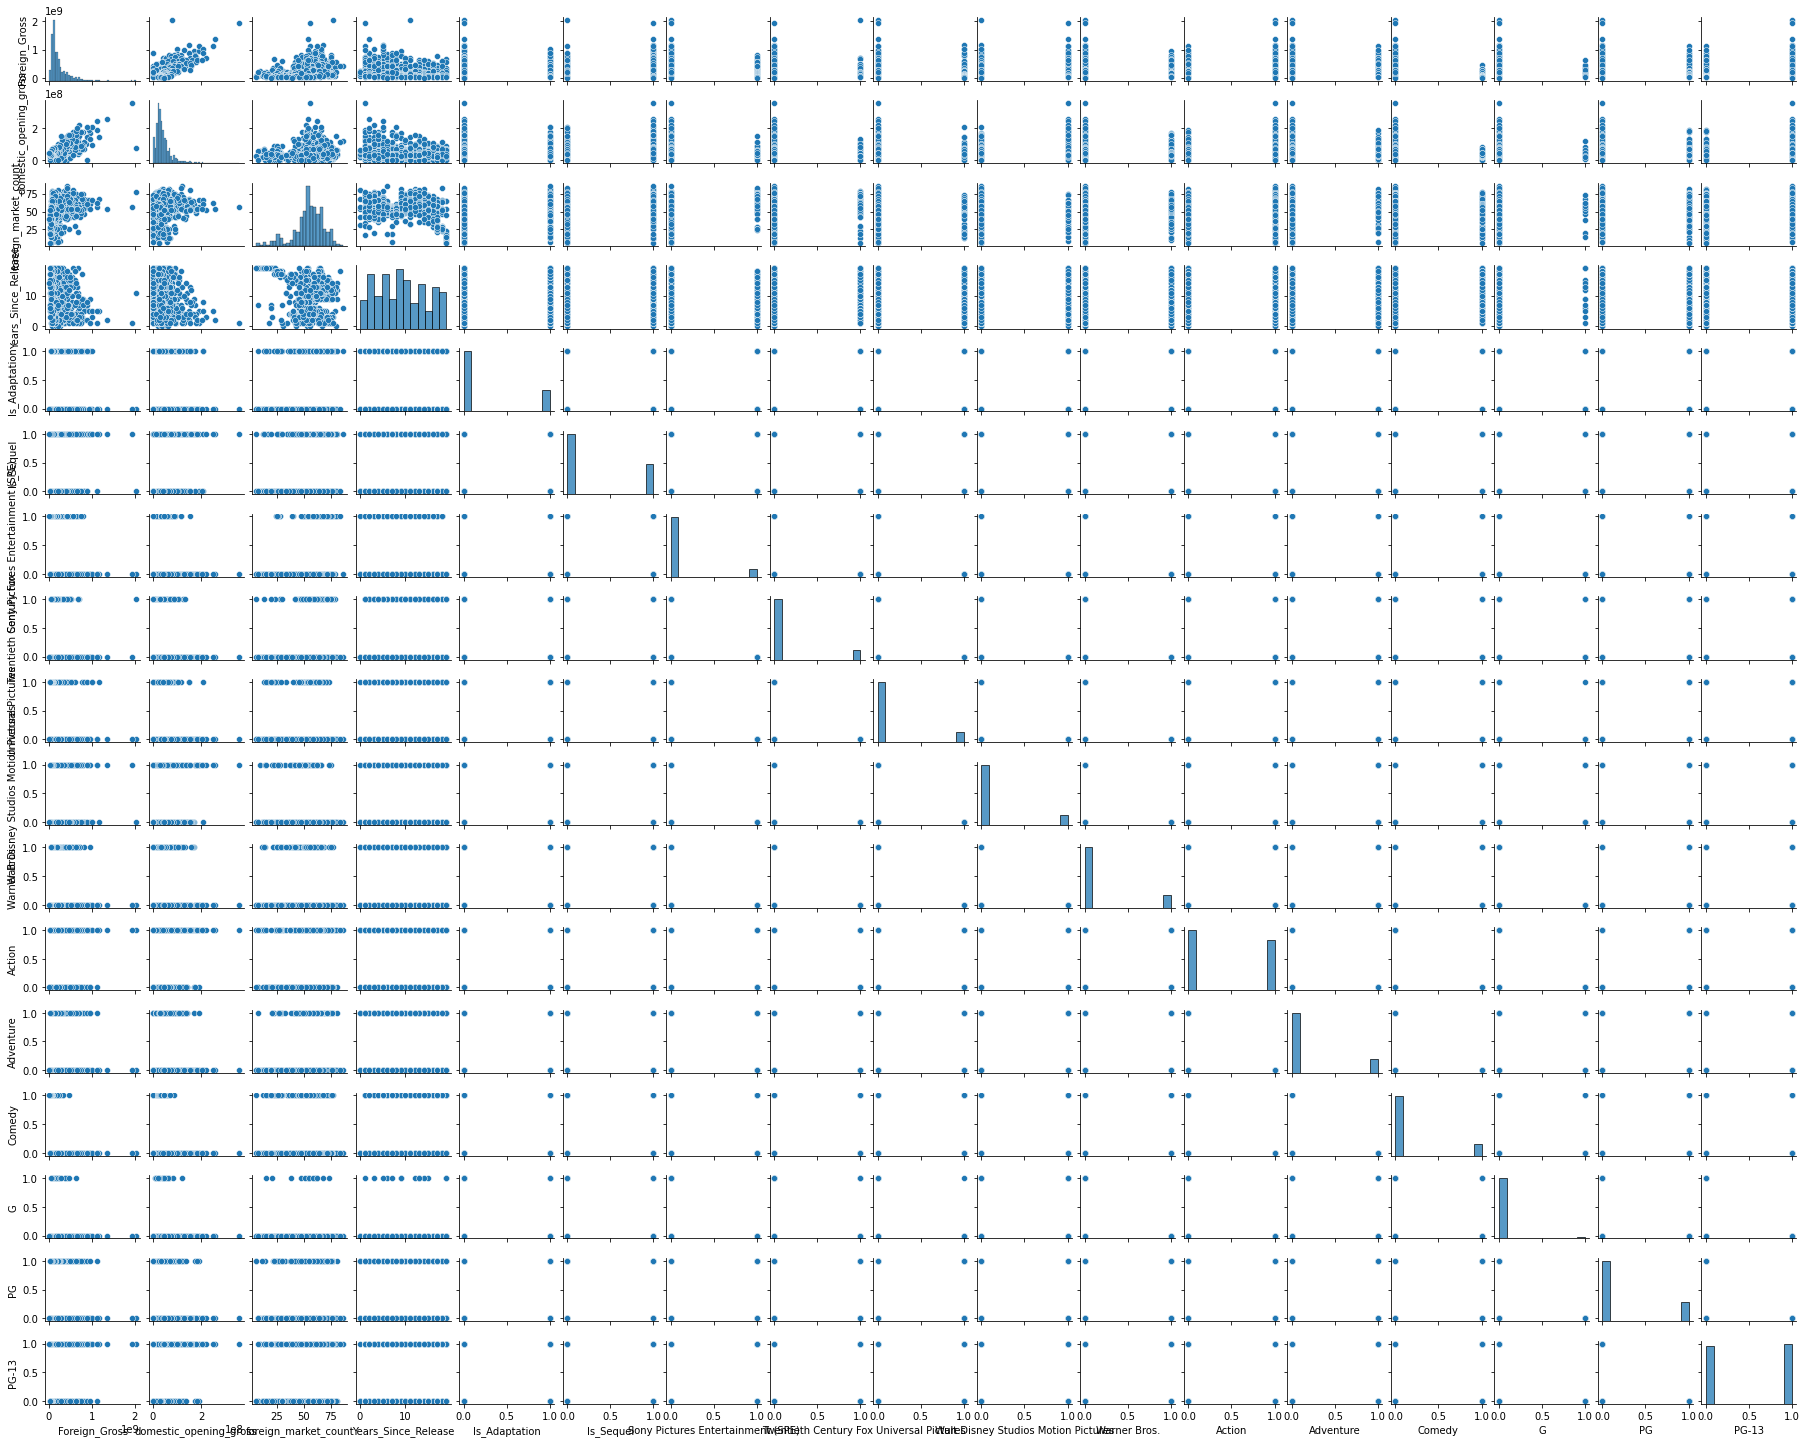

In [113]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(model_df, height=1.2, aspect=1.25);

### Let's Start with Linear Regression

#### First, let's clean up our dataframe a bit by making a new data frame with only the features we need to run regression

In [70]:
model_df.columns

Index(['id', 'Title', 'Domestic_Gross', 'Foreign_Gross',
       'domestic_opening_gross', 'rating', 'foreign_market_count',
       'distributor', 'director', 'actor_1', 'actor_2', 'Years_Since_Release',
       'Is_Adaptation', 'Is_Sequel', 'Sony Pictures Entertainment (SPE)',
       'Twentieth Century Fox', 'Universal Pictures',
       'Walt Disney Studios Motion Pictures', 'Warner Bros.', 'Action',
       'Adventure', 'Comedy', 'G', 'PG', 'PG-13'],
      dtype='object')

In [71]:
model_df.dtypes

id                                      int64
Title                                  object
Domestic_Gross                          int64
Foreign_Gross                           int64
domestic_opening_gross                  int64
rating                                 object
foreign_market_count                    int64
distributor                            object
director                               object
actor_1                                object
actor_2                                object
Years_Since_Release                     int64
Is_Adaptation                           int64
Is_Sequel                               int64
Sony Pictures Entertainment (SPE)       int64
Twentieth Century Fox                   int64
Universal Pictures                      int64
Walt Disney Studios Motion Pictures     int64
Warner Bros.                            int64
Action                                  int64
Adventure                               int64
Comedy                            

In [21]:
linear_df = model_df.drop(['id', 'Domestic_Gross', 'rating', 
       'distributor', 'director', 'actor_1', 'actor_2'], axis = 1)

In [111]:
#let's save this dataframe for the future.
linear_df.to_pickle('linear_df.pickle')

In [56]:
X, y = linear_df.drop(['Foreign_Gross', 'Title', 'Unnamed: 0'], axis = 1), linear_df['Foreign_Gross']
#split all data into X and y (for train+validate) and X and y test
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=7)
#split the train+validate--X and y again into separate train and validate buckets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [57]:
#set up linear regression
lm = LinearRegression()

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
#X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [58]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression TRAIN R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression VAL R^2: {lm.score(X_val, y_val):.3f}')
#y_predict = lm.predict(X_val)
#print(f'Linear Regression MSE: {mean_squared_error(X_train, y_train):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression TRAIN R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
print(f'Degree 2 polynomial regression VAL R^2: {lm_poly.score(X_val_poly, y_val):.3f}')
#y_poly_predict = lm_poly.predict(X_val_poly)
#print(f'Degree 2 polynomial regression MSE: {mean_squared_error(y_val, y_predict):.3f}')

Linear Regression TRAIN R^2: 0.621
Linear Regression VAL R^2: 0.543
Degree 2 polynomial regression TRAIN R^2: 0.663
Degree 2 polynomial regression VAL R^2: 0.556


In [163]:
0.621/0.543

1.1436464088397789

#### R^2 looks slightly better for polynomial regression, which is great to see. We may stick with that model. 

#### But I want to explore interactions--let's do that for a bit in our "Model-Branch 1- Interactions" notebook.

Our other notebook gives us a slightly higher R^2 with manual feature interaction selection.

The difference however, isn't major. 

#### Let's run a Lasso regression in order to see if there's even more chance of optimization by relying on computation instead of manual intuition.

### Lasso Regression

In [59]:
linear_df.shape

(847, 19)

In [185]:
linear_df.columns

Index(['Unnamed: 0', 'Title', 'Foreign_Gross', 'domestic_opening_gross',
       'foreign_market_count', 'Years_Since_Release', 'Is_Adaptation',
       'Is_Sequel', 'Sony Pictures Entertainment (SPE)',
       'Twentieth Century Fox', 'Universal Pictures',
       'Walt Disney Studios Motion Pictures', 'Warner Bros.', 'Action',
       'Adventure', 'Comedy', 'G', 'PG', 'PG-13'],
      dtype='object')

In [186]:
X, y = linear_df.drop(['Foreign_Gross', 'Title', 'Unnamed: 0'], axis=1), linear_df['Foreign_Gross']
#split all data into X and y (for train+validate) and X and y test
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=7)
#split the train+validate--X and y again into separate train and validate buckets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [187]:
#set up lasso regression
lasso = LassoCV()

#Feature transforms for train, val, so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)

#scale the features 
scale = StandardScaler(with_mean = False)

X_train_poly_scaled = scale.fit_transform(X_train_poly)
X_val_poly_scaled = scale.transform(X_val_poly)

#fit the features
lasso.fit(X_train_poly_scaled, y_train)

print(f'Lasso TRAIN R^2: {lasso.score(X_train_poly_scaled, y_train):.3f}')
print(f'Lasso VAL R^2: {lasso.score(X_val_poly_scaled, y_val):.3f}')

Lasso TRAIN R^2: 0.633
Lasso VAL R^2: 0.566


In [166]:
0.633/0.566

1.118374558303887

#### Lasso didn't help our scores much, which makes sense, because we weren't very overfit. But let's see if it can provide any information on which features to manually remove

In [188]:
lasso_features = list(zip(poly.get_feature_names(X_train.columns), lasso.coef_))

In [206]:
features_kept = []
for features in lasso_features:
    if abs(features[-1]) > 0:
        features_kept.append(features)

In [210]:
features_kept.sort(reverse=True)
features_kept

[('foreign_market_count Walt Disney Studios Motion Pictures',
  406899.22871111403),
 ('domestic_opening_gross^2', 40127460.16226624),
 ('domestic_opening_gross foreign_market_count', 79071767.02617663),
 ('domestic_opening_gross Warner Bros.', 4598760.275519894),
 ('domestic_opening_gross Walt Disney Studios Motion Pictures',
  11589305.77152559),
 ('domestic_opening_gross Twentieth Century Fox', 1419680.2655863361),
 ('domestic_opening_gross Is_Sequel', 5436002.962526062),
 ('domestic_opening_gross Comedy', -11485439.941073101),
 ('domestic_opening_gross Adventure', 19322709.898238324),
 ('domestic_opening_gross', 23155655.877413955),
 ('Years_Since_Release Comedy', -264122.17531080276),
 ('Years_Since_Release', -9217747.184207952),
 ('Warner Bros. Adventure', 1574576.7364742893),
 ('Is_Sequel PG-13', 2060583.753783282),
 ('Is_Sequel Adventure', 318419.98189274874),
 ('Is_Sequel Action', 478597.03548490565),
 ('Is_Adaptation Walt Disney Studios Motion Pictures', 3320989.5833338527),


#### Lasso has told us which features we might not need to use, and we created our best model yet from that knowledge combined with our intuition, in our "Model-Branch 2- Lasso informed Linear " notebook

In [25]:
#opening our df from our latest model from our Branch 2 notebook
linear_1_df = pd.read_pickle('residual_df.pickle')

In [200]:
#running stats on our best model yet
X, y = linear_1_df.drop(['Foreign_Gross', 'Title'], axis=1), linear_1_df['Foreign_Gross']
#split all data into X and y (for train+validate) and X and y test
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=3)
#split the train+validate--X and y again into separate train and validate buckets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=7)

In [201]:
#set up linear regression
lm = LinearRegression()

#validate

lm.fit(X_train, y_train)
print(f'Linear Regression TRAIN R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression VAL R^2: {lm.score(X_val, y_val):.3f}')
print(f'Train/Test Ratio: R^2: {lm.score(X_train, y_train)/lm.score(X_val, y_val):.3f}')


Linear Regression TRAIN R^2: 0.547
Linear Regression VAL R^2: 0.737
Train/Test Ratio: R^2: 0.741


#### These are our best R^2 numbers yet
Our train/test score also tells us that we're not at high risk of overfitting--we are actually underfit.

We still have a bit of time to add in new features to try to raise the R^2, so we will be doing that in the notebook "Model - New Features".

### Testing

#### We have built a model with better train and validation R^2 and has a great test R^2 as well, but our residuals and MAE indicate that model was not well fit and has a large average error for predictions. 

We are thus coming back to this model to see how it tests and whether its residuals and MAE indicate better fit and a smaller error.

In [202]:
lm.fit(X, y)
print(f'Linear Regression TRAIN R^2: {lm.score(X, y):.3f}')
print(f'Linear Regression TEST R^2: {lm.score(X_test, y_test):.3f}')
print(f'Train/Test Ratio: R^2: {lm.score(X, y)/lm.score(X_test, y_test):.3f}')

Linear Regression TRAIN R^2: 0.624
Linear Regression TEST R^2: 0.580
Train/Test Ratio: R^2: 1.076


R^2 and Train/Test ratio both look good. Let's look at other measures.

### MAE

Let's calculate our average error of prediction. We are using MAE because we already know we have outliers in our data (which we can't remove because due to the purposes of our model--the highest, surprise grossing blockbusters like Avatar may be outliers but we are here to predict blockbuster gross) and MAE is less succeptible to outliers than RSME. 

In [51]:
Y_pred = lm.predict(X_test)
Res = lm.predict(X_test) - y_test

In [37]:
from sklearn.metrics import r2_score,mean_absolute_error as mae, mean_squared_error as rmse
print(mae(y_test, Y_pred))


88322854.08256264


In [38]:
#average prediction 
np.average(y_test)

227196227.5117647

In [40]:
#error is less than 40% of average prediction, much better than that of our other model.
mae(y_test, Y_pred)/np.average(y_test)

0.38875141127943724

### Residuals

In [63]:
#adding residuals as a new column in our training df
#changing dollar values to millions for cleaner visuals
X_test["RES"] = Res/1000000

In [64]:
#adding predictions as a new column in our training df
#changing dollar values to millions for cleaner visuals
X_test["YPred"] = Y_pred/1000000

In [67]:
X_test

,domestic_opening_gross,Years_Since_Release,dom_X_foreign_market,dom_X_Sequel,dom_X_Disney,dom_X_Adventure,dom_X_Comedy,foreign_X_Disney,Years_X_Comedy,Adaptation_X_Disney,Sequel_X_Action,Sequel_X_Adventure,Action_X_PG-13,RES,YPred
314,82429469,7,4451191326,82429469,82429469,82429469,0,54,0,0,0,1,0,50.977137,526.043980
653,102750665,14,7295297215,102750665,0,0,0,0,0,0,1,0,1,269.205076,495.277905
121,43899340,6,2326665020,0,0,0,0,0,0,0,0,0,0,-129.117329,203.082671
352,66411834,7,3519827202,0,0,0,0,0,0,0,0,0,1,-37.221905,300.426260
155,61025472,3,2441018880,61025472,0,0,0,0,0,0,1,0,1,-86.334836,312.265164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,38291056,16,2450627584,0,0,0,0,0,0,0,0,0,1,112.659877,209.804736
112,47510360,6,2993152680,0,0,47510360,0,0,0,0,0,0,0,-217.418887,290.819265
209,85737841,7,4629843414,85737841,85737841,0,0,54,0,0,1,0,1,17.213635,455.634635
132,49451322,6,2719822710,49451322,0,0,0,0,0,0,1,0,0,-184.463890,260.070705


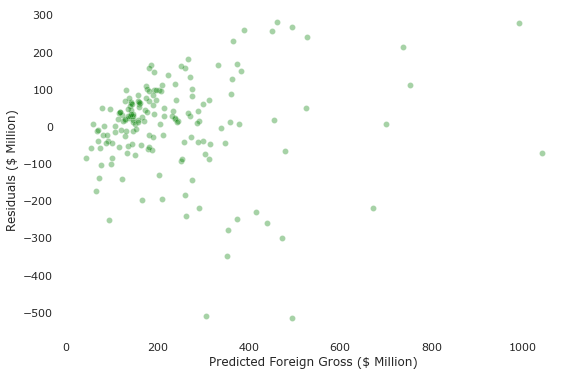

In [230]:
# Plotting our residuals (in millions)

sns.set(style="white", font = 'verdana')

f, ax = plt.subplots(figsize=(9, 6))

sns.scatterplot(x=(Y_pred/1000000), y= (Res/1000000), alpha=0.35, color = 'green')

#plt.tight_layout()

ax.set(ylabel="Residuals ($ Million)", xlabel="Predicted Foreign Gross ($ Million)")
sns.despine(left=True, bottom=True, right = True)

plt.savefig('Residuals_Updated.png', dpi=300)

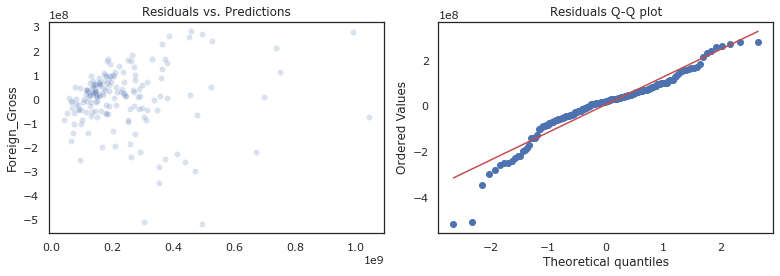

In [45]:
#plotting a QQ plot

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

sns.scatterplot(x=Y_pred , y= Res, alpha=0.2, ax=axes[0])
stats.probplot(Res, dist="norm", plot=axes[1])

axes[0].set_title("Residuals vs. Predictions")
axes[1].set_title("Residuals Q-Q plot")

plt.tight_layout()

#### These residuals are much more random than our other model, and the MAE is much lower, so this is officially our final model!

Before we explore residuals further, let's explore:

### Which features matter the most?

First, we must scale the coefficients to compare apples to apples.

In [198]:
model_features = list(zip((X.columns), lm.coef_))

In [224]:
#scale the features 
scale = StandardScaler(with_mean = False)

X_scaled = scale.fit_transform(X)
X_test_scaled = scale.transform(X_test)

lm.fit(X_scaled, y)

#get features and corresponding coefficients
model_features = list(zip((X.columns), lm.coef_))
#sort by highest absolute coefficient value
model_features.sort(key = lambda x: abs(x[-1]), reverse = True) 
model_features

[('dom_X_foreign_market', 81007099.95639938),
 ('domestic_opening_gross', 35236626.53512785),
 ('dom_X_Disney', 31904289.07385268),
 ('dom_X_Adventure', 30443091.630397726),
 ('dom_X_Comedy', -18568412.13496837),
 ('Action_X_PG-13', 17991645.307562582),
 ('Years_Since_Release', -16414396.631882548),
 ('dom_X_Sequel', 11223905.970901713),
 ('Sequel_X_Adventure', 10144889.27060464),
 ('foreign_X_Disney', -10059896.930661488),
 ('Adaptation_X_Disney', 10000051.830952423),
 ('Sequel_X_Action', 9928812.19676173),
 ('Years_X_Comedy', 7754025.539392617)]

In [72]:
X_test

,domestic_opening_gross,Years_Since_Release,dom_X_foreign_market,dom_X_Sequel,dom_X_Disney,dom_X_Adventure,dom_X_Comedy,foreign_X_Disney,Years_X_Comedy,Adaptation_X_Disney,Sequel_X_Action,Sequel_X_Adventure,Action_X_PG-13,RES,YPred
314,82429469,7,4451191326,82429469,82429469,82429469,0,54,0,0,0,1,0,50.977137,526.043980
653,102750665,14,7295297215,102750665,0,0,0,0,0,0,1,0,1,269.205076,495.277905
121,43899340,6,2326665020,0,0,0,0,0,0,0,0,0,0,-129.117329,203.082671
352,66411834,7,3519827202,0,0,0,0,0,0,0,0,0,1,-37.221905,300.426260
155,61025472,3,2441018880,61025472,0,0,0,0,0,0,1,0,1,-86.334836,312.265164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,38291056,16,2450627584,0,0,0,0,0,0,0,0,0,1,112.659877,209.804736
112,47510360,6,2993152680,0,0,47510360,0,0,0,0,0,0,0,-217.418887,290.819265
209,85737841,7,4629843414,85737841,85737841,0,0,54,0,0,1,0,1,17.213635,455.634635
132,49451322,6,2719822710,49451322,0,0,0,0,0,0,1,0,0,-184.463890,260.070705


In [99]:
titles = linear_1_df[['Title', 'Foreign_Gross']]

In [100]:
X_test_residuals = pd.merge(titles,X_test,left_on= titles.index,right_on= X_test.index)

In [101]:
X_test_residuals['ABS RES'] = abs(X_test_residuals['RES'])

In [102]:
#reindex so the df is easier to read
cols = X_test_residuals.columns.tolist()
cols


['key_0',
 'Title',
 'Foreign_Gross',
 'domestic_opening_gross',
 'Years_Since_Release',
 'dom_X_foreign_market',
 'dom_X_Sequel',
 'dom_X_Disney',
 'dom_X_Adventure',
 'dom_X_Comedy',
 'foreign_X_Disney',
 'Years_X_Comedy',
 'Adaptation_X_Disney',
 'Sequel_X_Action',
 'Sequel_X_Adventure',
 'Action_X_PG-13',
 'RES',
 'YPred',
 'ABS RES']

In [107]:
#move columns to front of df
cols.insert(0, cols.pop(cols.index('RES')))
cols.insert(1, cols.pop(cols.index('ABS RES')))
cols.insert(2, cols.pop(cols.index('YPred')))
cols.insert(3, cols.pop(cols.index('Foreign_Gross')))

In [108]:
#re index
X_test_residuals= X_test_residuals.reindex(columns= cols)

In [156]:
#set Foreign Gross and domestic opening gross to millions for standardization in df
X_test_residuals['Foreign_Gross'] = X_test_residuals['Foreign_Gross']/1000000
X_test_residuals['domestic_opening_gross'] = X_test_residuals['Foreign_Gross']/1000000


In [157]:
#predictions with fewer than 10 mil in absolute residuals
best_predictions = X_test_residuals.sort_values(by = 'ABS RES')[:12]
best_predictions

,RES,ABS RES,YPred,Foreign_Gross,Title,domestic_opening_gross,Years_Since_Release,dom_X_foreign_market,dom_X_Sequel,dom_X_Disney,dom_X_Adventure,dom_X_Comedy,foreign_X_Disney,Years_X_Comedy,Adaptation_X_Disney,Sequel_X_Action,Sequel_X_Adventure,Action_X_PG-13
139,0.880070,0.880070,82.786070,81.906000,The Bucket List,0.000082,13,19814383,0,0,0,335837,0,13,0,0,0,0
18,1.974346,1.974346,107.370415,105.396069,Step Up Revolution,0.000105,8,492731736,11731708,0,0,0,0,0,0,0,0,0
119,-3.712782,3.712782,339.390448,343.103230,Star Wars: Episode II - Attack of the Clones,0.000343,18,5041752282,80027814,0,0,0,0,0,0,1,0,0
52,-4.734905,4.734905,152.365095,157.100000,Annabelle Comes Home,0.000157,1,871598089,20269723,0,0,0,0,0,0,0,0,0
115,6.654942,6.654942,379.622512,372.967570,It,0.000373,3,5059540179,0,0,0,0,0,0,0,0,0,0
160,6.791647,6.791647,58.856026,52.064379,Dreamgirls,0.000052,14,22358050,0,0,0,0,0,0,0,0,0,0
14,7.613504,7.613504,206.479719,198.866215,Terminator: Dark Fate,0.000199,1,1422657768,29033832,0,0,0,0,0,0,1,0,0
141,8.073832,8.073832,151.943395,143.869563,Knives Out,0.000144,1,2061255196,0,0,0,26769548,0,1,0,0,0,0
55,8.264690,8.264690,699.541383,691.276693,Alice in Wonderland,0.000691,10,6966061380,0,116101023,116101023,0,60,0,1,0,0,0
108,-8.360127,8.360127,119.797694,128.157821,American Wedding,0.000128,17,1668472000,33369440,0,0,33369440,0,17,0,0,0,0


In [158]:
best_predictions.describe()

,RES,ABS RES,YPred,Foreign_Gross,domestic_opening_gross,Years_Since_Release,dom_X_foreign_market,dom_X_Sequel,dom_X_Disney,dom_X_Adventure,dom_X_Comedy,foreign_X_Disney,Years_X_Comedy,Adaptation_X_Disney,Sequel_X_Action,Sequel_X_Adventure,Action_X_PG-13
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.0,12.0
mean,2.007864,6.230401,221.096362,219.088498,0.000219,9.250000,2.226851e+09,1.453604e+07,9.675085e+06,1.392926e+07,5.039569e+06,5.000000,2.583333,0.083333,0.166667,0.0,0.0
std,6.750004,2.759307,184.333744,181.717394,0.000182,6.607503,2.297514e+09,2.407162e+07,3.351548e+07,3.536468e+07,1.177622e+07,17.320508,5.869154,0.288675,0.389249,0.0,0.0
min,-8.527408,0.880070,58.856026,52.064379,0.000052,1.000000,1.981438e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,-3.968312,4.479374,101.224329,99.523552,0.000100,2.500000,4.416019e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,4.314644,7.202576,152.154245,150.484781,0.000150,9.000000,1.545565e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,7.728586,8.288549,299.388070,293.433846,0.000293,14.750000,3.366255e+09,2.246075e+07,0.000000e+00,0.000000e+00,8.395925e+04,0.000000,0.250000,0.000000,0.000000,0.0,0.0
max,9.176559,9.176559,699.541383,691.276693,0.000691,18.000000,6.966061e+09,8.002781e+07,1.161010e+08,1.161010e+08,3.336944e+07,60.000000,17.000000,1.000000,1.000000,0.0,0.0


In [159]:
#top 10 over predictions
top_over_predictions = X_test_residuals.sort_values(by = 'RES', ascending = False)[:10]
top_over_predictions

,RES,ABS RES,YPred,Foreign_Gross,Title,domestic_opening_gross,Years_Since_Release,dom_X_foreign_market,dom_X_Sequel,dom_X_Disney,dom_X_Adventure,dom_X_Comedy,foreign_X_Disney,Years_X_Comedy,Adaptation_X_Disney,Sequel_X_Action,Sequel_X_Adventure,Action_X_PG-13
144,282.023542,282.023542,461.180837,179.157295,Solo: A Star Wars Story,0.000179,2,4389865428,84420489,84420489,0,0,52,0,0,1,0,1
113,278.578758,278.578758,990.937563,712.358805,Star Wars: Episode VIII - The Last Jedi,0.000712,3,11440498368,220009584,220009584,0,0,52,0,0,1,0,1
131,269.205076,269.205076,495.277905,226.072829,X-Men: The Last Stand,0.000226,14,7295297215,102750665,0,0,0,0,0,0,1,0,1
161,260.760886,260.760886,388.711313,127.950427,Star Trek,0.000128,11,4888278785,75204289,0,0,0,0,0,0,1,0,1
123,258.692673,258.692673,451.872380,193.179707,X-Men Origins: Wolverine,0.000193,11,6379350225,85058003,0,0,0,0,0,0,1,0,1
148,242.106581,242.106581,528.490613,286.384032,The Hunger Games,0.000286,8,7931858844,0,0,0,0,0,0,0,0,0,1
155,229.973415,229.973415,364.783231,134.809816,The Lorax,0.000135,8,3861938850,0,0,70217070,0,0,0,0,0,0,0
130,213.576597,213.576597,737.456993,523.880396,Rogue One: A Star Wars Story,0.000524,4,8219329093,155081681,155081681,0,0,53,0,0,1,0,1
153,181.885640,181.885640,266.785640,84.900000,Into the Woods,0.000085,6,1801011534,0,31051923,31051923,0,58,0,1,0,0,0
102,168.797245,168.797245,374.097245,205.300000,Fast & Furious,0.000205,11,4611782500,70950500,0,0,0,0,0,0,1,0,1


In [160]:
top_over_predictions.describe()

,RES,ABS RES,YPred,Foreign_Gross,domestic_opening_gross,Years_Since_Release,dom_X_foreign_market,dom_X_Sequel,dom_X_Disney,dom_X_Adventure,dom_X_Comedy,foreign_X_Disney,Years_X_Comedy,Adaptation_X_Disney,Sequel_X_Action,Sequel_X_Adventure,Action_X_PG-13
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,10.0,10.000000,10.0,10.000000,10.000000,10.0,10.000000
mean,238.560041,238.560041,505.959372,267.399331,0.000267,7.800000,6.081921e+09,7.934752e+07,4.905637e+07,1.012690e+07,0.0,21.500000,0.0,0.100000,0.700000,0.0,0.800000
std,39.605286,39.605286,211.506966,198.136678,0.000198,3.994441,2.748121e+09,7.079179e+07,7.921862e+07,2.325969e+07,0.0,27.805875,0.0,0.316228,0.483046,0.0,0.421637
min,168.797245,168.797245,266.785640,84.900000,0.000085,2.000000,1.801012e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
25%,217.675802,217.675802,377.750762,145.896686,0.000146,4.500000,4.445345e+09,1.773762e+07,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.000000,0.250000,0.0,1.000000
50%,250.399627,250.399627,456.526609,199.239854,0.000199,8.000000,5.633815e+09,7.981239e+07,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.000000,1.000000,0.0,1.000000
75%,267.094028,267.094028,520.187436,271.306231,0.000271,11.000000,7.772718e+09,9.832750e+07,7.107835e+07,0.000000e+00,0.0,52.000000,0.0,0.000000,1.000000,0.0,1.000000
max,282.023542,282.023542,990.937563,712.358805,0.000712,14.000000,1.144050e+10,2.200096e+08,2.200096e+08,7.021707e+07,0.0,58.000000,0.0,1.000000,1.000000,0.0,1.000000


In [161]:
#top 10 over predictions
top_under_predictions = X_test_residuals.sort_values(by = 'RES')[:10]
top_under_predictions

,RES,ABS RES,YPred,Foreign_Gross,Title,domestic_opening_gross,Years_Since_Release,dom_X_foreign_market,dom_X_Sequel,dom_X_Disney,dom_X_Adventure,dom_X_Comedy,foreign_X_Disney,Years_X_Comedy,Adaptation_X_Disney,Sequel_X_Action,Sequel_X_Adventure,Action_X_PG-13
2,-515.432806,515.432806,494.563927,1009.996733,The Fate of the Furious,0.001010,3,6421135825,98786705,0,0,0,0,0,0,1,0,1
37,-507.496041,507.496041,305.928038,813.424079,Aquaman,0.000813,2,3190055534,0,0,0,0,0,0,0,0,0,1
23,-347.507969,347.507969,353.392031,700.900000,The Hobbit: The Battle of the Five Armies,0.000701,6,2736216700,54724334,0,54724334,0,0,0,0,0,1,0
44,-298.673544,298.673544,472.729992,771.403536,Transformers: Dark of the Moon,0.000771,9,6360436225,97852865,0,0,0,0,0,0,1,0,1
53,-278.373866,278.373866,353.740478,632.114344,Harry Potter and the Half-Blood Prince,0.000632,11,4903650801,77835727,0,0,0,0,0,0,1,0,0
26,-259.864257,259.864257,440.135743,700.000000,The Hobbit: The Desolation of Smaug,0.000700,7,3976840638,73645197,0,73645197,0,0,0,0,0,1,0
15,-249.354326,249.354326,94.145674,343.500000,The Last Samurai,0.000344,17,679597912,0,0,0,0,0,0,0,0,0,0
8,-248.493694,248.493694,373.828872,622.322566,Pirates of the Caribbean: Dead Men Tell No Tales,0.000622,3,3275129156,62983253,62983253,0,0,52,0,0,1,0,1
16,-238.812902,238.812902,261.630316,500.443218,Kung Fu Panda 2,0.000500,9,3097659630,47656302,0,0,0,0,0,0,1,0,0
17,-227.780338,227.780338,414.789307,642.569645,Venom,0.000643,2,6019181700,0,0,0,0,0,0,0,0,0,1


In [162]:
top_under_predictions.describe()

,RES,ABS RES,YPred,Foreign_Gross,domestic_opening_gross,Years_Since_Release,dom_X_foreign_market,dom_X_Sequel,dom_X_Disney,dom_X_Adventure,dom_X_Comedy,foreign_X_Disney,Years_X_Comedy,Adaptation_X_Disney,Sequel_X_Action,Sequel_X_Adventure,Action_X_PG-13
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,10.0,10.000000,10.0,10.0,10.000000,10.000000,10.000000
mean,-317.178974,317.178974,356.488438,673.667412,0.000674,6.900000,4.065990e+09,5.134844e+07,6.298325e+06,1.283695e+07,0.0,5.200000,0.0,0.0,0.500000,0.200000,0.500000
std,108.027511,108.027511,117.221905,178.880429,0.000179,4.794673,1.852989e+09,3.899025e+07,1.991705e+07,2.742767e+07,0.0,16.443844,0.0,0.0,0.527046,0.421637,0.527046
min,-515.432806,227.780338,94.145674,343.500000,0.000344,2.000000,6.795979e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,-335.299362,248.708852,317.794036,624.770511,0.000625,3.000000,3.120759e+09,1.191408e+07,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
50%,-269.119061,269.119061,363.784675,671.284823,0.000671,6.500000,3.625985e+09,5.885379e+07,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.0,0.500000,0.000000,0.500000
75%,-248.708852,335.299362,433.799134,753.777652,0.000754,9.000000,5.740299e+09,7.678809e+07,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.0,1.000000,0.000000,1.000000
max,-227.780338,515.432806,494.563927,1009.996733,0.001010,17.000000,6.421136e+09,9.878670e+07,6.298325e+07,7.364520e+07,0.0,52.000000,0.0,0.0,1.000000,1.000000,1.000000


It seems the model seems to underpredict more than it overpredicts, at least for the top 10 in each category in terms of dollar value. Let's see if this is true.

### Over vs Under Predictions

In [181]:
#Let's take a look at our average df stats as a reference before exploring over and under prediction stats
X_test_residuals.describe()

,RES,ABS RES,YPred,Foreign_Gross,domestic_opening_gross,Years_Since_Release,dom_X_foreign_market,dom_X_Sequel,dom_X_Disney,dom_X_Adventure,dom_X_Comedy,foreign_X_Disney,Years_X_Comedy,Adaptation_X_Disney,Sequel_X_Action,Sequel_X_Adventure,Action_X_PG-13
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,5.854969,88.322854,233.051196,227.196228,0.000227,8.835294,2.336384e+09,2.010309e+07,9.236857e+06,9.973279e+06,4.519017e+06,6.617647,1.611765,0.035294,0.217647,0.058824,0.305882
std,125.072542,88.490330,156.627462,193.201709,0.000193,5.390869,1.974305e+09,3.519597e+07,3.134228e+07,2.590221e+07,1.224276e+07,17.876656,4.259606,0.185067,0.413865,0.235989,0.462141
min,-515.432806,0.880070,42.739420,19.530702,0.000020,1.000000,4.089240e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-43.929014,28.525079,138.347607,105.547052,0.000106,4.000000,1.064221e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.572249,59.054430,186.985444,159.145495,0.000159,9.000000,1.851045e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68.897572,112.026464,283.530549,258.064453,0.000258,13.000000,2.922365e+09,3.349520e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,282.023542,515.432806,1042.034732,1113.325747,0.001113,19.000000,1.144050e+10,2.200096e+08,2.200096e+08,1.917708e+08,6.921689e+07,62.000000,19.000000,1.000000,1.000000,1.000000,1.000000


On average, the foreign gross is 10x the domestic opening

In [172]:
over_predictions = X_test_residuals[X_test_residuals['RES'] > 0]
over_predictions.describe()

,RES,ABS RES,YPred,Foreign_Gross,domestic_opening_gross,Years_Since_Release,dom_X_foreign_market,dom_X_Sequel,dom_X_Disney,dom_X_Adventure,dom_X_Comedy,foreign_X_Disney,Years_X_Comedy,Adaptation_X_Disney,Sequel_X_Action,Sequel_X_Adventure,Action_X_PG-13
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,1.050000e+02,1.050000e+02,1.050000e+02,1.050000e+02,1.050000e+02,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,76.239190,76.239190,238.813824,162.574634,0.000163,8.276190,2.388337e+09,2.094537e+07,1.093646e+07,9.789584e+06,5.975681e+06,7.419048,1.676190,0.047619,0.228571,0.057143,0.342857
std,68.322998,68.322998,150.687485,126.463221,0.000126,4.933198,1.858436e+09,3.650218e+07,3.397918e+07,2.306946e+07,1.424419e+07,18.509759,4.110248,0.213980,0.421927,0.233229,0.476941
min,0.880070,0.880070,58.856026,19.530702,0.000020,1.000000,4.089240e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.325788,28.325788,145.158439,89.491916,0.000089,4.000000,1.219800e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.986690,54.986690,191.294777,118.083355,0.000118,8.000000,1.900129e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,99.910061,99.910061,271.274458,198.866215,0.000199,11.000000,2.738123e+09,3.350787e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,282.023542,282.023542,990.937563,712.358805,0.000712,19.000000,1.144050e+10,2.200096e+08,2.200096e+08,1.209081e+08,6.921689e+07,62.000000,17.000000,1.000000,1.000000,1.000000,1.000000


Overprediction avg. MAE =  *76 million*

Overprediction avg. domestic opening = *163 thousand*

In [173]:
under_predictions = X_test_residuals[X_test_residuals['RES'] < 0]
under_predictions.describe()

,RES,ABS RES,YPred,Foreign_Gross,domestic_opening_gross,Years_Since_Release,dom_X_foreign_market,dom_X_Sequel,dom_X_Disney,dom_X_Adventure,dom_X_Comedy,foreign_X_Disney,Years_X_Comedy,Adaptation_X_Disney,Sequel_X_Action,Sequel_X_Adventure,Action_X_PG-13
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,6.500000e+01,6.500000e+01,6.500000e+01,6.500000e+01,6.500000e+01,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,-107.842619,107.842619,223.742337,331.584956,0.000332,9.738462,2.252460e+09,1.874247e+07,6.491346e+06,1.027002e+07,2.165946e+06,5.323077,1.507692,0.015385,0.200000,0.061538,0.246154
std,111.648704,111.648704,166.551289,233.793429,0.000234,5.987688,2.160754e+09,3.320968e+07,2.655923e+07,3.011130e+07,7.548376e+06,16.863522,4.521211,0.124035,0.403113,0.242186,0.434122
min,-515.432806,3.712782,42.739420,77.307444,0.000077,1.000000,6.759446e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-142.035198,37.221905,100.876720,159.945314,0.000160,3.000000,6.795979e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-62.547014,62.547014,181.733270,240.099518,0.000240,10.000000,1.668472e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-37.221905,142.035198,300.426260,398.600000,0.000399,15.000000,3.097660e+09,3.336944e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,-3.712782,515.432806,1042.034732,1113.325747,0.001113,19.000000,1.073916e+10,1.480246e+08,1.917708e+08,1.917708e+08,4.497932e+07,62.000000,19.000000,1.000000,1.000000,1.000000,1.000000


Underprediction avg. MAE =  *107 million*

Underprediction avg. domestic opening = *332 thousand*

#### Since the purpose of our model is for business projections, having a higher underprediction MAE than overprediction MAE is very beneficial!

We can also note that because best predictions had an average domestic gross of 219 thousand, much closer to the average of the entire test dataset at 227 than both under and overpredictions, that our model is best for predicting movies that have an average opening weekend gross (for blockbusters, that is) than it is for domestic opening weekend hits and flops.